In [178]:
from qiskit import QuantumCircuit, QuantumRegister

In [179]:
import os, sys

sys.path.append(os.path.abspath("../"))


In [180]:
from helperfunctions.reversecircuitgraph import reverse_all_operations
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit

In [181]:
num_i = 2
num_a = 2
# num_o = 2

In [182]:
def example_circuit_1():
    i = QuantumRegister(num_i, 'i')
    # o = QuantumRegister(num_o, 'o')
    a = QuantumRegister(num_a, 'a')

    circ = QuantumCircuit(i,a)

    circ.cx(i[0],a[0])

    circ.cx(i[0],a[1])
    circ.ccx(i[1],a[0],a[1])
    circ.cx(a[1],i[0])

    return circ

def example_circuit_2():
    i = QuantumRegister(num_i, 'i')
    # o = QuantumRegister(num_o, 'o')
    a = QuantumRegister(num_a, 'a')

    circ = QuantumCircuit(i,a)

    circ.cx(i[0],a[0])

    circ.ccx(i[1],a[0],a[1])
    circ.cx(i[0],a[1])
    circ.cx(a[1],i[0])

    return circ

def example_circuit_3():
    i = QuantumRegister(num_i, 'i')
    # o = QuantumRegister(num_o, 'o')
    a = QuantumRegister(num_a, 'a')

    circ = QuantumCircuit(i,a)

    circ.cx(i[0],a[0])

    circ.cx(a[1],i[0])
    circ.ccx(i[1],a[0],a[1])
    circ.cx(i[0],a[1])


    return circ




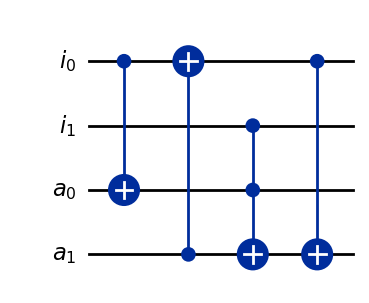

In [183]:
circ = example_circuit_3()


circ.draw('mpl')

['a0', 'a1']


Adding Nodes for Circuit: 100%|██████████| 4/4 [00:00<00:00, 35098.78it/s]

[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled a0 @ index: 2 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 3 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 5 of type input is a computation node.
, CGNode: Labeled a1 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
]


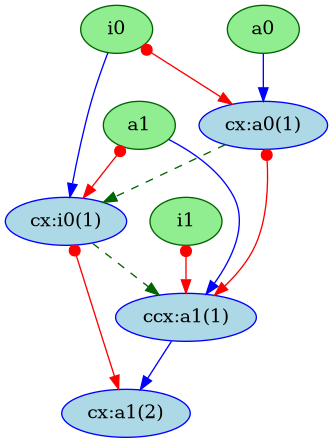

In [184]:
from helperfunctions.graphhelper import breakdown_qubit, edge_attr, node_attr
from rustworkx.visualization import graphviz_draw

qubits =  [breakdown_qubit(q)['label'] for q in circ.qubits]

# ancillas_list = qubits[:num_i] + qubits[-num_a:] 
ancillas_list = qubits[-num_a:] 

# output_list = qubits[num_i:num_i+num_o]
print(ancillas_list)
# print(output_list)

cg = get_computation_graph(circ, ancillas_list, outputs=None)

print(cg.nodes())

graphviz_draw(cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled a0 @ index: 2 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 3 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 5 of type input is a computation node.
, CGNode: Labeled a1 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 8 of type ancilla is a uncomputation node.
, CGNode: Labeled a1 @ index: 9 of type ancilla is a uncomputation node.
, CGNode: Labeled i0 @ index: 10 of type input is a uncomputation node.
, CGNode: Labeled a0 @ index: 11 of type ancilla is a uncomputation node.
]


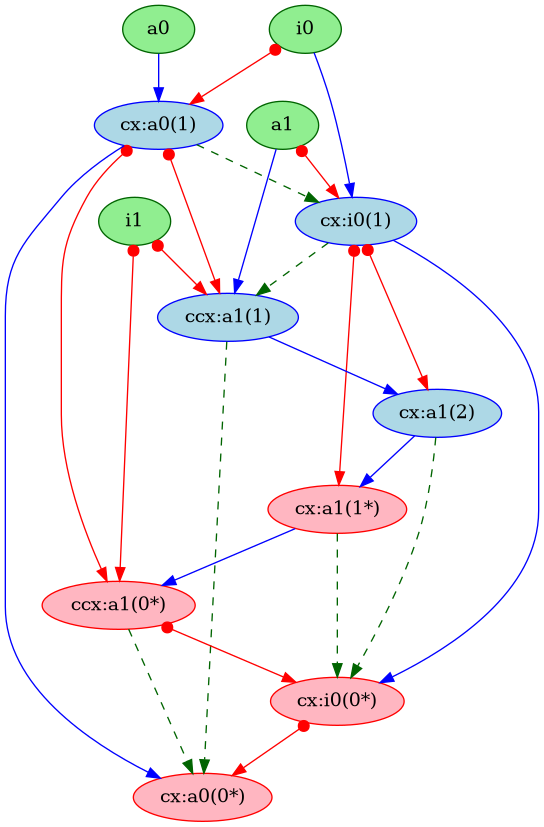

In [185]:
all_uncomp_cg = reverse_all_operations(cg)
print(all_uncomp_cg.nodes())
graphviz_draw(all_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 12/12 [00:00<00:00, 59353.36it/s]

8


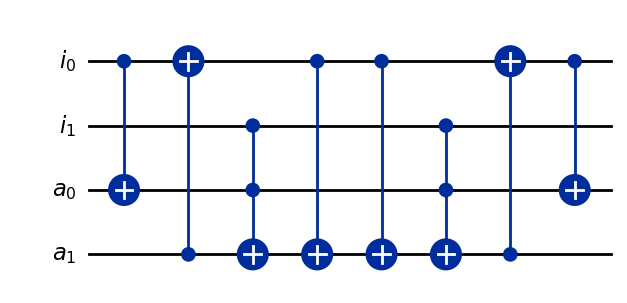

In [186]:
uncomp_circ = get_uncomp_circuit(all_uncomp_cg)
print(sum(uncomp_circ.count_ops().values()))
uncomp_circ.draw('mpl')

True
[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled a0 @ index: 2 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 3 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 5 of type input is a computation node.
, CGNode: Labeled a1 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 8 of type ancilla is a uncomputation node.
, CGNode: Labeled a1 @ index: 9 of type ancilla is a uncomputation node.
, CGNode: Labeled a0 @ index: 10 of type ancilla is a uncomputation node.
]


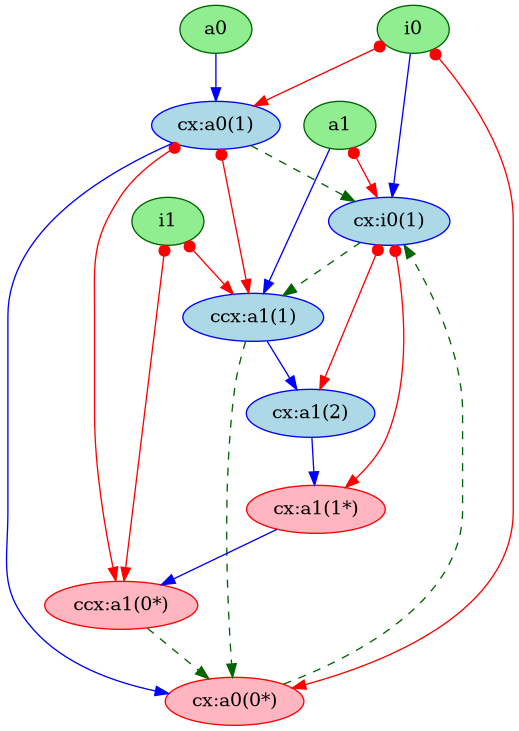

In [187]:
from helperfunctions.uncompfunctions import add_uncomputation


pldi_uncomp_cg, has_cycles = add_uncomputation(cg, ancillas_list)
print(has_cycles)
print(pldi_uncomp_cg.nodes())
graphviz_draw(pldi_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


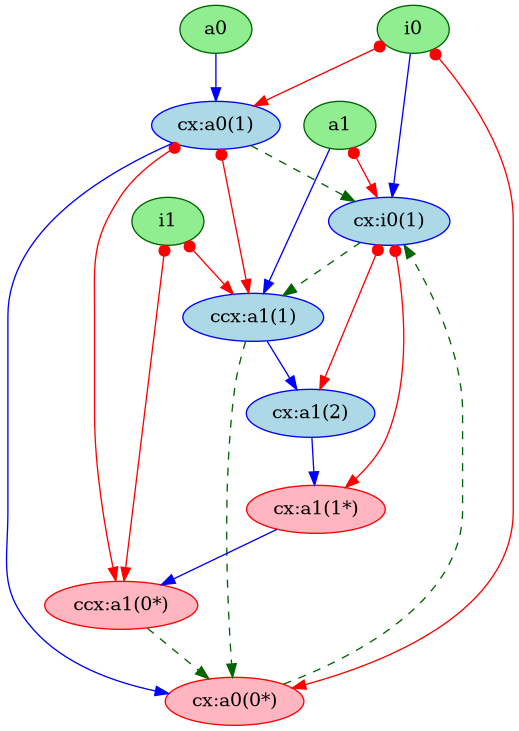

In [188]:
if not has_cycles:
    pldi_uncomp_circ = get_uncomp_circuit(pldi_uncomp_cg)
    print(sum(pldi_uncomp_circ.count_ops().values()))
    pldi_uncomp_circ.draw('mpl')
else:
    pldi_uncomp_cg, has_cycles = add_uncomputation(cg, ancillas_list, allow_cycle=True)

graphviz_draw(pldi_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)
    


In [189]:
from rustworkx.rustworkx import simple_cycles
from collections import Counter
from helperfunctions.constants import StringConstants

ANCILLA = StringConstants.ANCILLA.value

pldi_simple_cycles = simple_cycles(pldi_uncomp_cg)
ancilla_counter = Counter(ancillas_list)
ancilla_counter.subtract(ancillas_list)
print(ancilla_counter)

for cycle in pldi_simple_cycles:
    print([pldi_uncomp_cg.get_node_data(i).simple_graph_label() for i in cycle])
    for i in cycle:
        node = pldi_uncomp_cg.get_node_data(i)
        if node.qubit_type is ANCILLA:
            ancilla_counter[f'{node.qubit_name}{node.qubit_wire}'] += 1

print(ancilla_counter)

Counter({'a0': 0, 'a1': 0})
['cx:a0(0*)', 'cx:i0(1)', 'ccx:a1(1)', 'cx:a1(2)', 'cx:a1(1*)', 'ccx:a1(0*)']
['cx:a0(0*)', 'cx:i0(1)', 'ccx:a1(1)']
['cx:a0(0*)', 'cx:i0(1)', 'cx:a1(2)', 'cx:a1(1*)', 'ccx:a1(0*)']
['cx:a0(0*)', 'cx:i0(1)', 'cx:a1(1*)', 'ccx:a1(0*)']
Counter({'a1': 10, 'a0': 4})


Checking Out Exhaustive Uncomp for All Ancillas: 4it [00:00, 2655.46it/s]

[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled a0 @ index: 2 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 3 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 5 of type input is a computation node.
, CGNode: Labeled a1 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 8 of type ancilla is a uncomputation node.
, CGNode: Labeled a1 @ index: 9 of type ancilla is a uncomputation node.
]


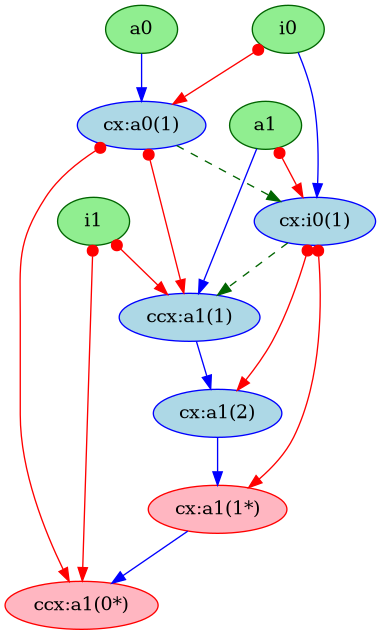

In [190]:
from helperfunctions.uncompfunctions import exhaustive_uncomputation


exhaustive_uncomp_cg = exhaustive_uncomputation(cg, ancillas_list)
# print(has_cycles)
print(exhaustive_uncomp_cg.nodes())
graphviz_draw(exhaustive_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


Building uncomp circuit from circuit graph: 100%|██████████| 10/10 [00:00<00:00, 60349.70it/s]

6


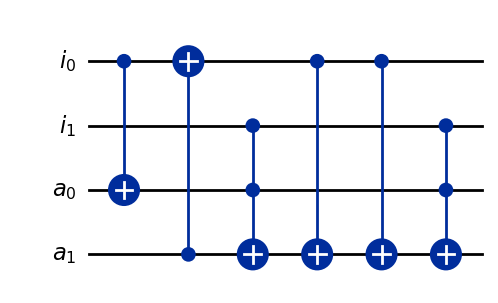

In [191]:
exhaustive_uncomp_circ = get_uncomp_circuit(exhaustive_uncomp_cg)
print(sum(exhaustive_uncomp_circ.count_ops().values()))
exhaustive_uncomp_circ.draw('mpl')

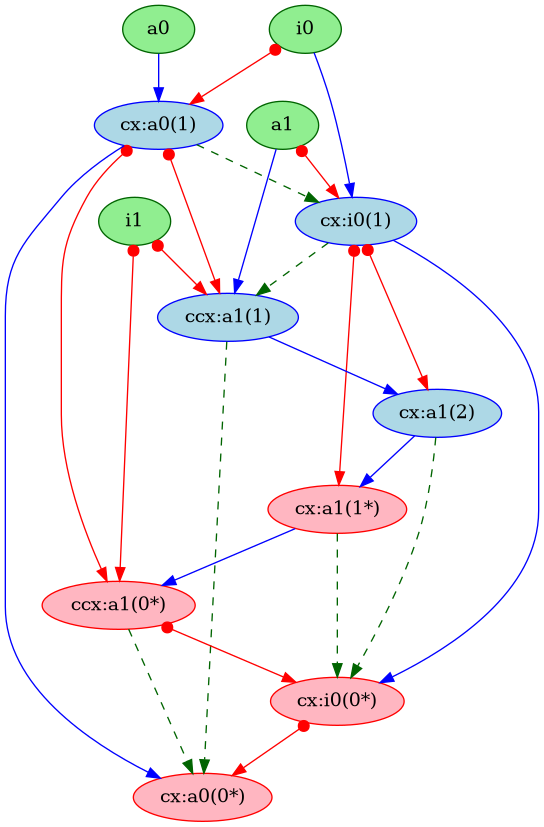

In [192]:
from helperfunctions.reversecircuitgraph import uncomp_operations

exhaustive_bennetts_uncomp_cg = uncomp_operations(exhaustive_uncomp_cg)

graphviz_draw(exhaustive_bennetts_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 12/12 [00:00<00:00, 60640.54it/s]


8


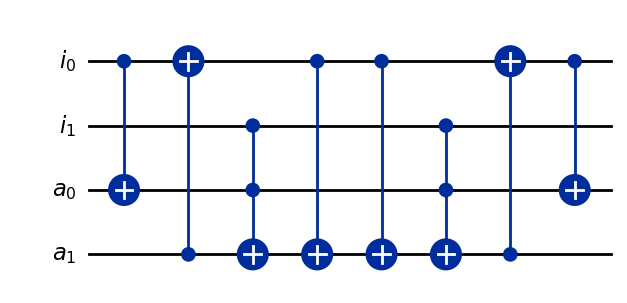

In [193]:
exhaustive_bennetts_uncomp_circ = get_uncomp_circuit(exhaustive_bennetts_uncomp_cg)
print(sum(exhaustive_bennetts_uncomp_circ.count_ops().values()))
exhaustive_bennetts_uncomp_circ.draw('mpl')

Iterating over all cycles:   0%|          | 4/100000 [00:00<00:05, 17172.18it/s]


a1 6


Iterating over all cycles:   0%|          | 1/100000 [00:00<00:03, 25420.02it/s]

a0 1
[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled a0 @ index: 2 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 3 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 5 of type input is a computation node.
, CGNode: Labeled a1 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
]


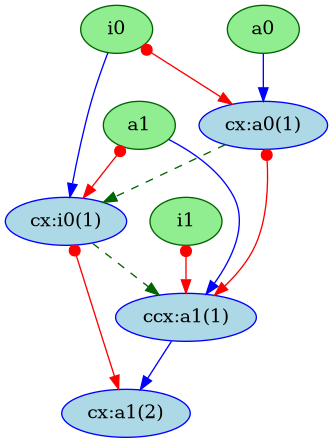

In [194]:
from helperfunctions.uncompfunctions import greedy_uncomputation_partial


greedy_partial_uncomp_cg = greedy_uncomputation_partial(cg, ancillas_list)
# print(has_cycles)
print(greedy_partial_uncomp_cg.nodes())
graphviz_draw(greedy_partial_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 8/8 [00:00<00:00, 53261.00it/s]


4


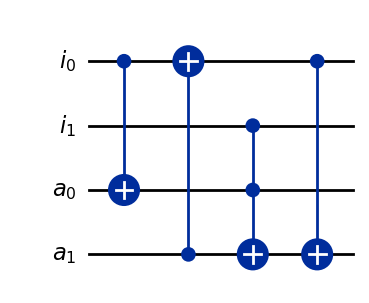

In [195]:
greedy_partial_uncomp_circ = get_uncomp_circuit(greedy_partial_uncomp_cg)
print(sum(greedy_partial_uncomp_circ.count_ops().values()))
greedy_partial_uncomp_circ.draw('mpl')